# About the Data

* **carat (0.2-5.01):** The carat is the diamond’s physical weight measured in metric carats. One carat equals 0.20 gram and is subdivided into 100 points. 
* **cut (Fair, Good, Very Good, Premium, Ideal):** The quality of the cut. The more precise the diamond is cut, the more captivating the diamond is to the eye thus of high grade. 
* **color (from J (worst) to D (best)):** The colour of gem-quality diamonds occurs in many hues. In the range from colourless to light yellow or light brown. Colourless diamonds are the rarest. Other natural colours (blue, red, pink for example) are known as "fancy,” and their colour grading is different than from white colorless diamonds. 
* **clarity (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)):** Diamonds can have internal characteristics known as inclusions or external characteristics known as blemishes. Diamonds without inclusions or blemishes are rare; however, most characteristics can only be seen with magnification. 
* **depth (43-79)**: It is the total depth percentage which equals to z / mean(x, y) = 2 * z / (x + y). The depth of the diamond is its height (in millimetres) measured from the culet (bottom tip) to the table (flat, top surface) as referred in the labelled diagram above. 
* **table (43-95):** It is the width of the top of the diamond relative to widest point. It gives diamond stunning fire and brilliance by reflecting lights to all directions which when seen by an observer, seems lustrous. 
* **price ($$326 - $18826):** It is the price of the diamond in US dollars. **It is our very target column in the dataset.**
* **x (0 - 10.74):** Length of the diamond (in mm) 
* **y (0 - 58.9):** Width of the diamond (in mm) 
* **z (0 - 31.8):** Depth of the diamond (in mm) 

## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
raw_data = pd.read_csv('diamonds.csv')
dia_df = raw_data.copy()

## Examining the Data

In [3]:
dia_df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [4]:
dia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
dia_df.shape

(53940, 11)

**The 'Unnamed' column seems to be index so it will be dropped in further steps.**

In [6]:
dia_df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

**As can be seen, there are no null values in the columns.**

In [7]:
dia_df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

## Preprocessing and Cleaning

**Firstly, the index colum needs to be dropped.**

### The cell below shows the fundamental statistical features

In [8]:
dia_df = dia_df.drop(['Unnamed: 0'], axis = 1)
dia_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


**The 'x', 'y', 'z' columns' min values are 0, this indicates that there faulty values such as dimensionless or 2- dimensional diamonds.**

In [9]:
dia_df = dia_df.drop(dia_df[dia_df['x'] == 0].index)
dia_df = dia_df.drop(dia_df[dia_df['y'] == 0].index)
dia_df = dia_df.drop(dia_df[dia_df['z'] == 0].index)
dia_df.shape

(53920, 10)

In [10]:
# Encoding the data

dia_encoded_df = dia_df.copy()

columns = ['cut', 'color', 'clarity']
label_encoder = LabelEncoder()
for col in columns:
    dia_encoded_df[col] = label_encoder.fit_transform(dia_encoded_df[col])
dia_encoded_df.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,2.553079,2.594028,3.835441,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.027705,1.701272,1.724549,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Outlier Detection

In [11]:
numerical_columns = dia_df.select_dtypes(include=['float64', 'int64']).columns

z_score_outliers = {}
iqr_outliers = {}

def detect_z_score_outliers(column):
    z_scores = zscore(column)
    return len(column[(z_scores > 3) | (z_scores < -3)])

def detect_iqr_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return len(column[(column < lower_bound) | (column > upper_bound)])

In [12]:
for col in numerical_columns:
    z_score_outliers[col] = detect_z_score_outliers(dia_df[col])
    iqr_outliers[col] = detect_iqr_outliers(dia_df[col])

print("Outliers detected using Z-score method:")
for col, count in z_score_outliers.items():
    print(f"{col}: {count}")

print("\nOutliers detected using IQR method:")
for col, count in iqr_outliers.items():
    print(f"{col}: {count}")

Outliers detected using Z-score method:
carat: 436
depth: 685
table: 335
price: 1206
x: 35
y: 27
z: 36

Outliers detected using IQR method:
carat: 1883
depth: 2543
table: 604
price: 3532
x: 24
y: 22
z: 29


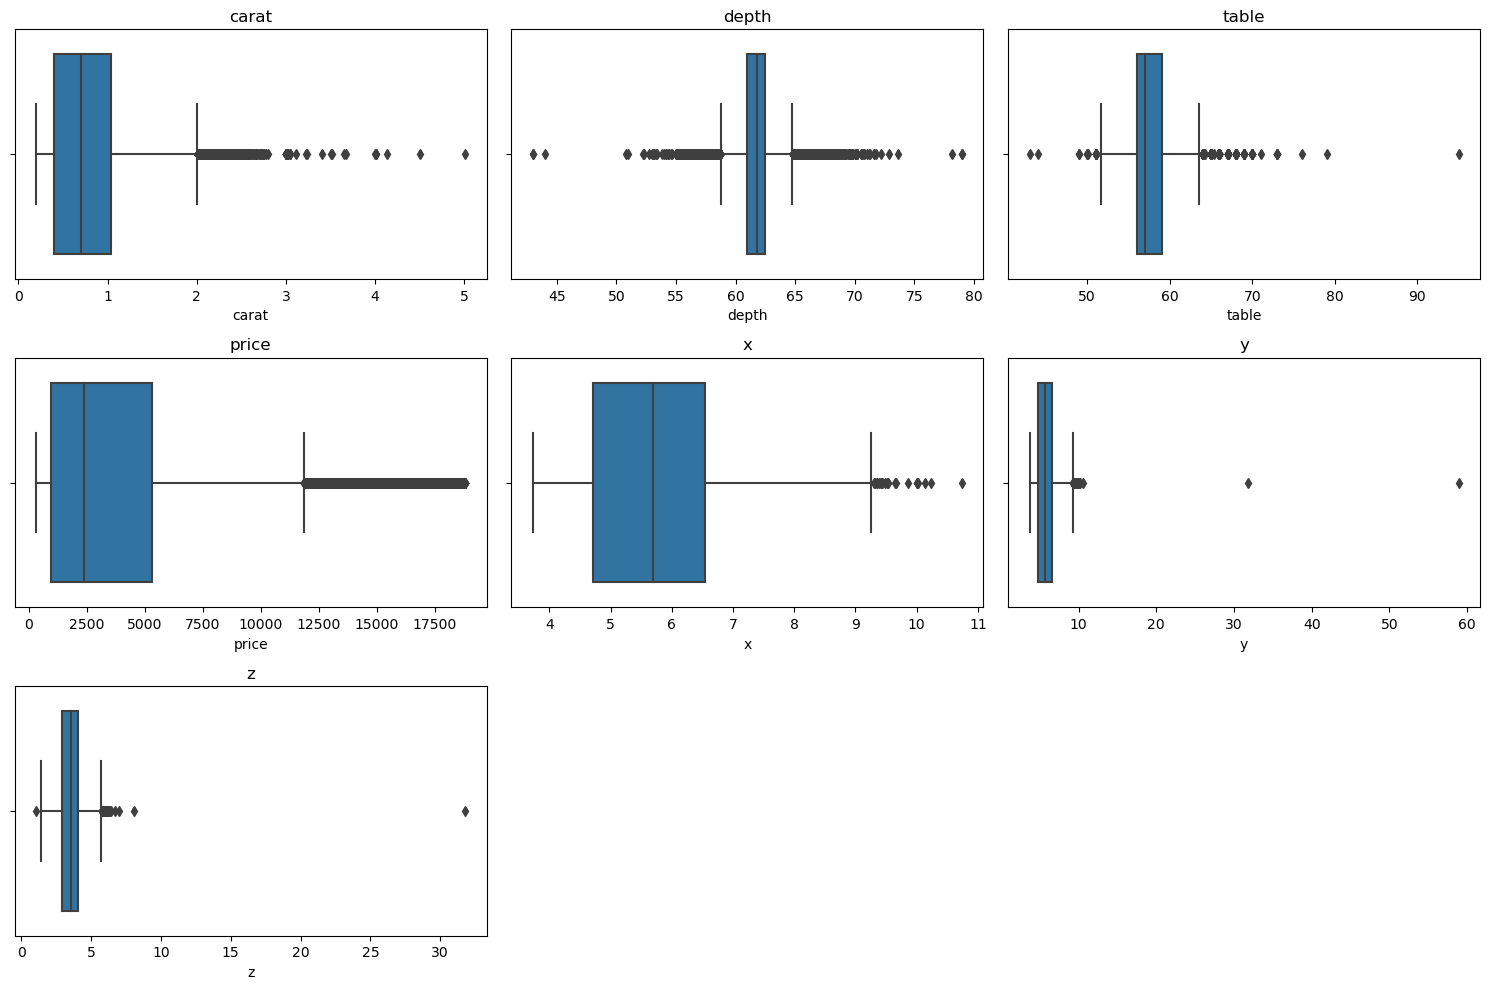

In [13]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=dia_encoded_df[column])
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

**Dropping the outliers, because it is relatively big dataset**

In [14]:
dia_df = dia_df[(dia_df['depth'] < 75) & (dia_df['depth'] > 45)]
dia_df = dia_df[(dia_df['table'] < 75) & (dia_df['table'] > 45)]
dia_df = dia_df[(dia_df['x'] < 40)]
dia_df = dia_df[(dia_df['x'] < 40)]
dia_df = dia_df[(dia_df['x'] < 40) & (dia_df['z'] > 2)]
dia_df.shape

(53906, 10)

## Data Visualization

**Distribution and range of values for each attribute**

<Figure size 2000x2000 with 0 Axes>

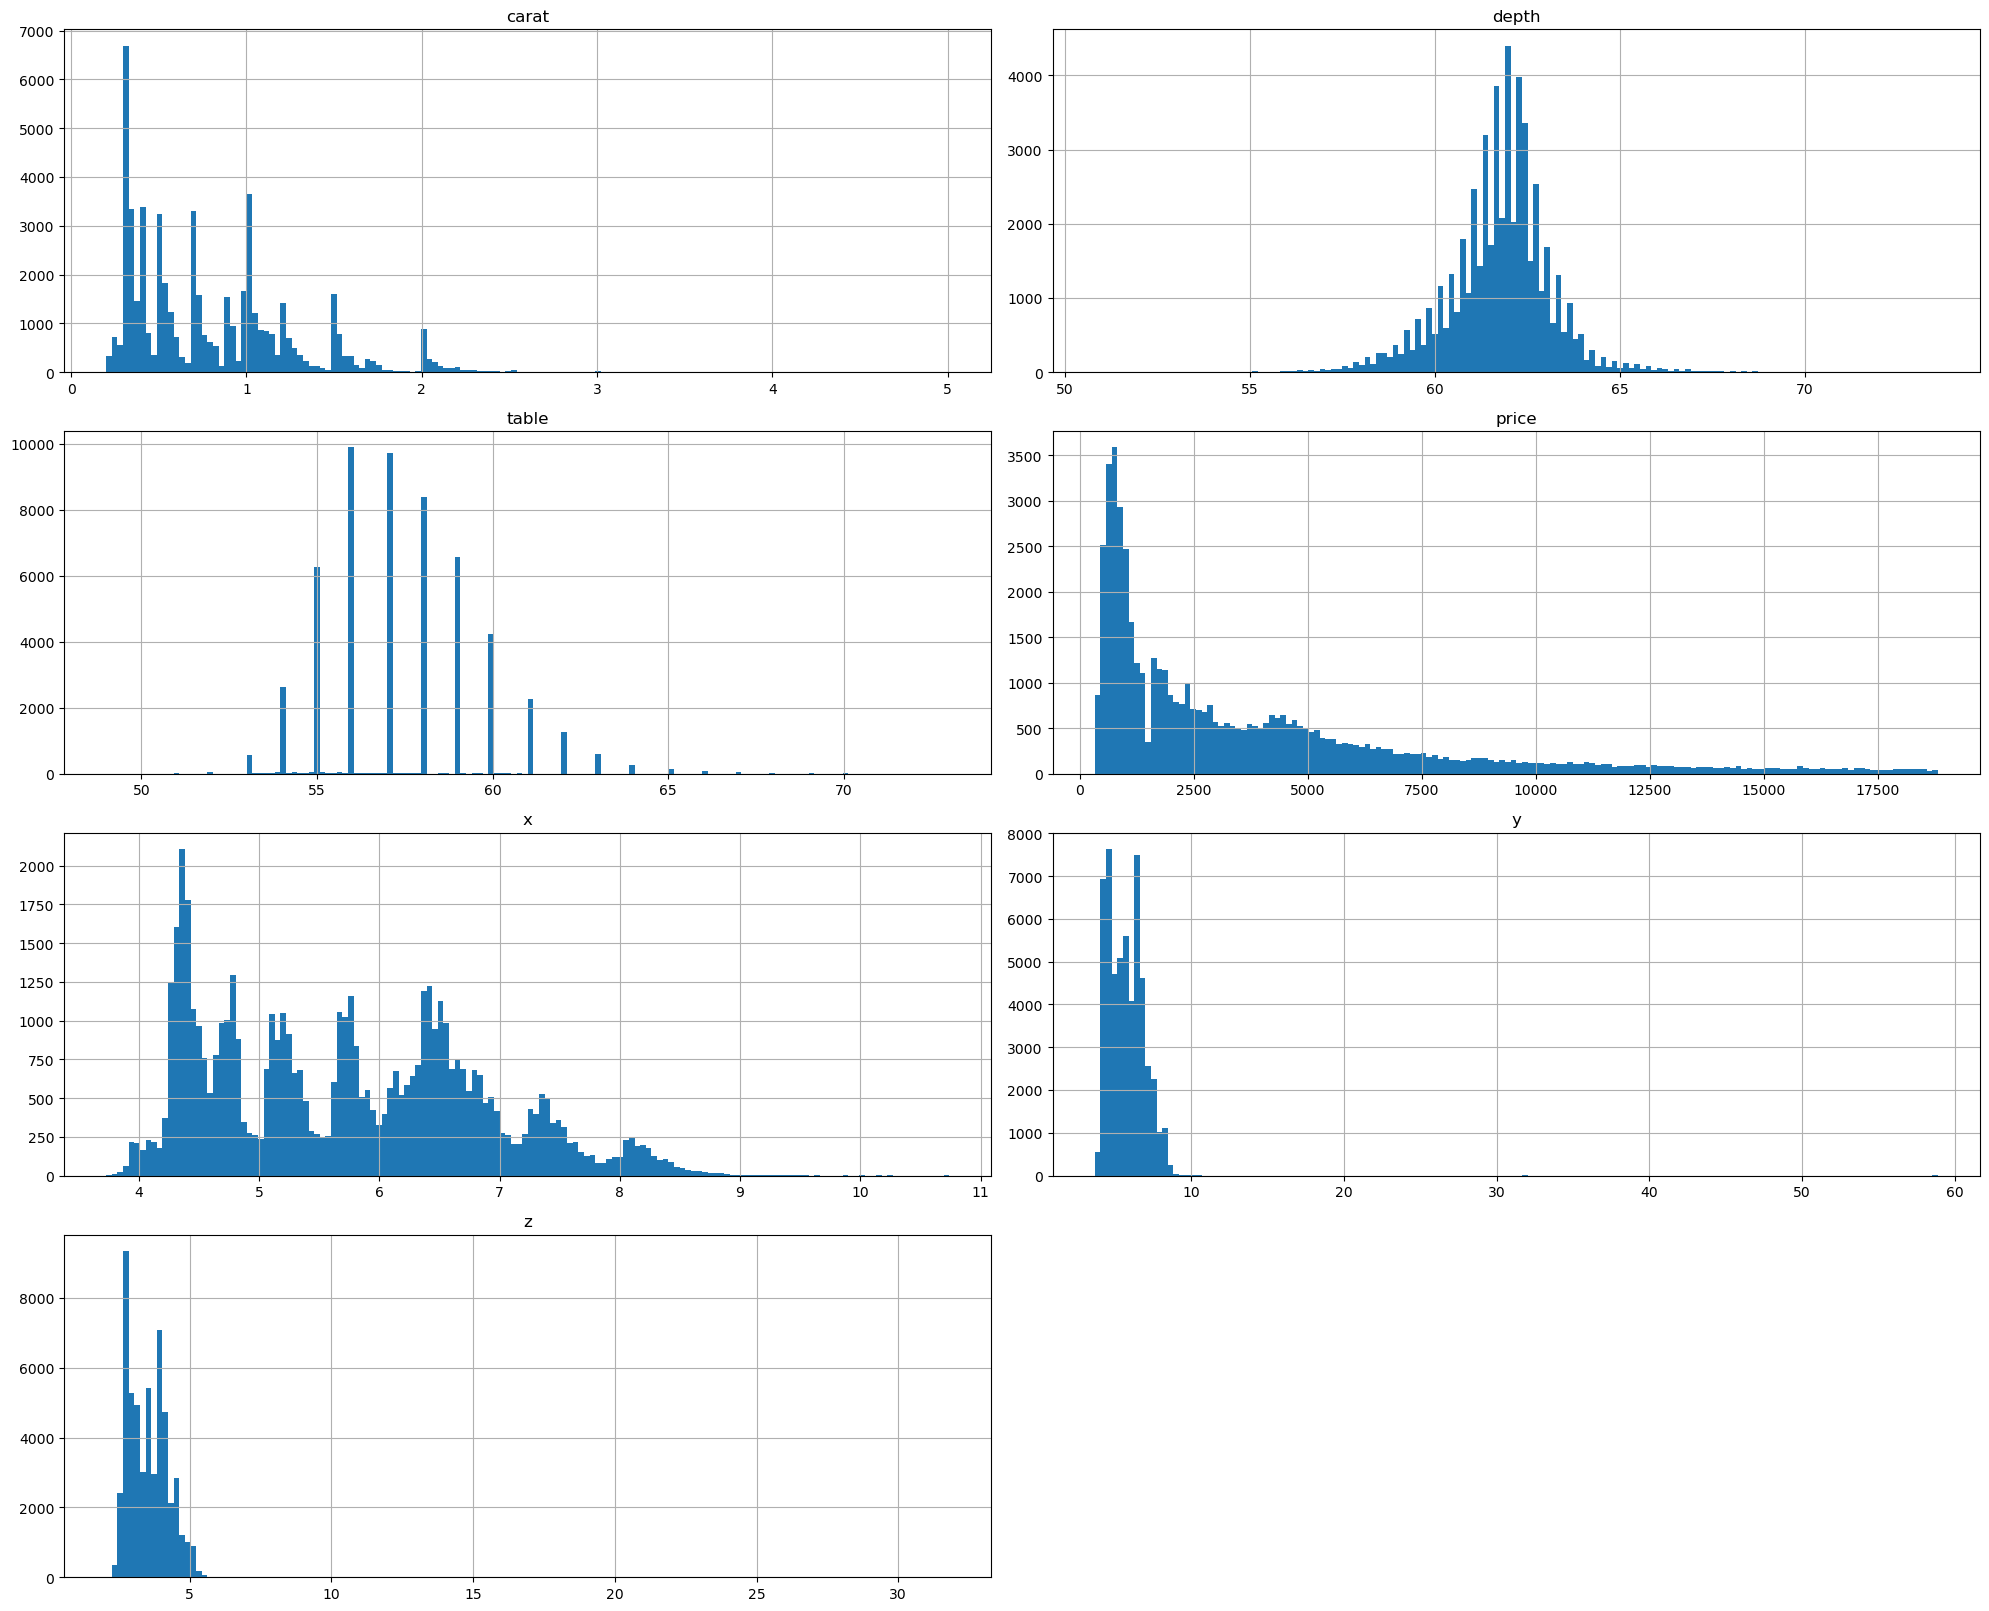

In [15]:
plt.figure(figsize=(20, 20))

dia_df.hist(bins=150, figsize=(20, 20), layout=(5, 2))

plt.tight_layout()
plt.show()

**Better cuts (Premium, Ideal) leading to the higher prices. Plot shows that higher-quality cuts have wider and higher price distribution**


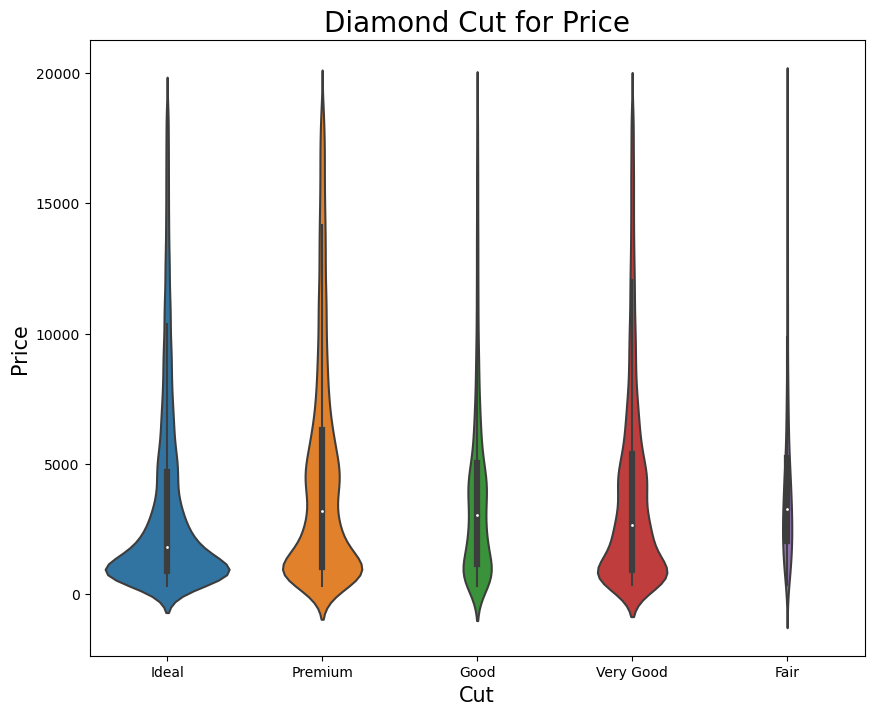

In [16]:
plt.figure(figsize=(10,8))
ax = sns.violinplot(x = "cut",y = "price", data = dia_df, scale= "count")
ax.set_title("Diamond Cut for Price", fontsize = 20)
ax.set_ylabel("Price", fontsize = 15)
ax.set_xlabel("Cut", fontsize = 15)
plt.show()

**High color grades (closer to colorless diamonds such D and E) leading higher prices.**

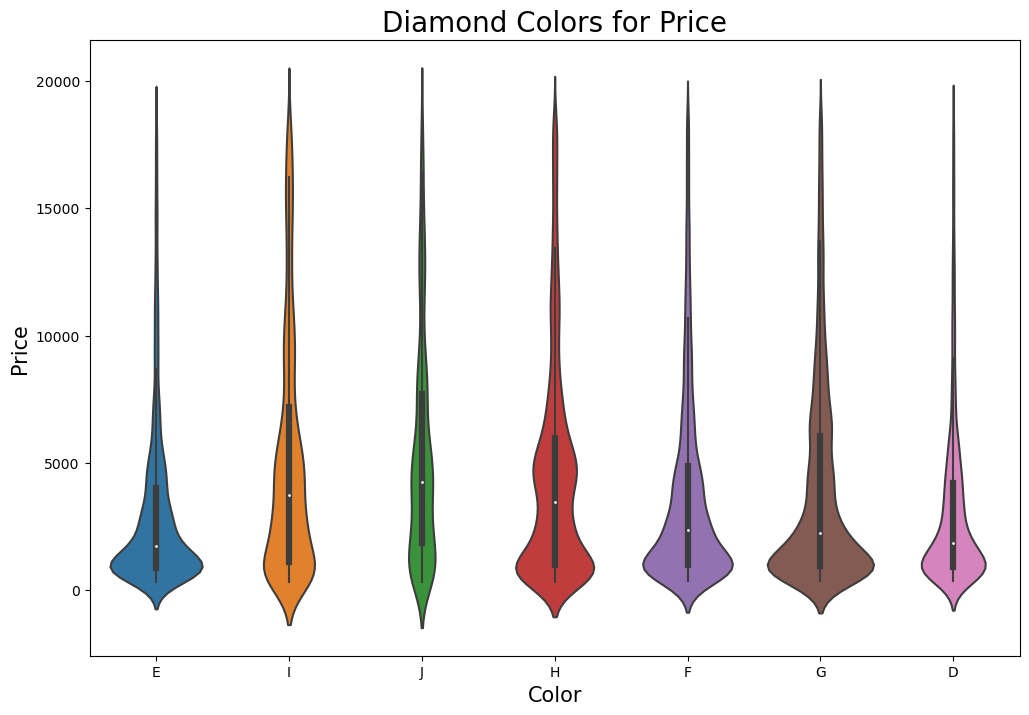

In [17]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x = "color",y="price", data = dia_df, scale = "count")
ax.set_title("Diamond Colors for Price", fontsize = 20)
ax.set_ylabel("Price", fontsize = 15)
ax.set_xlabel("Color", fontsize = 15)
plt.show()

**Diamonds with higher clarity are more expensive.**

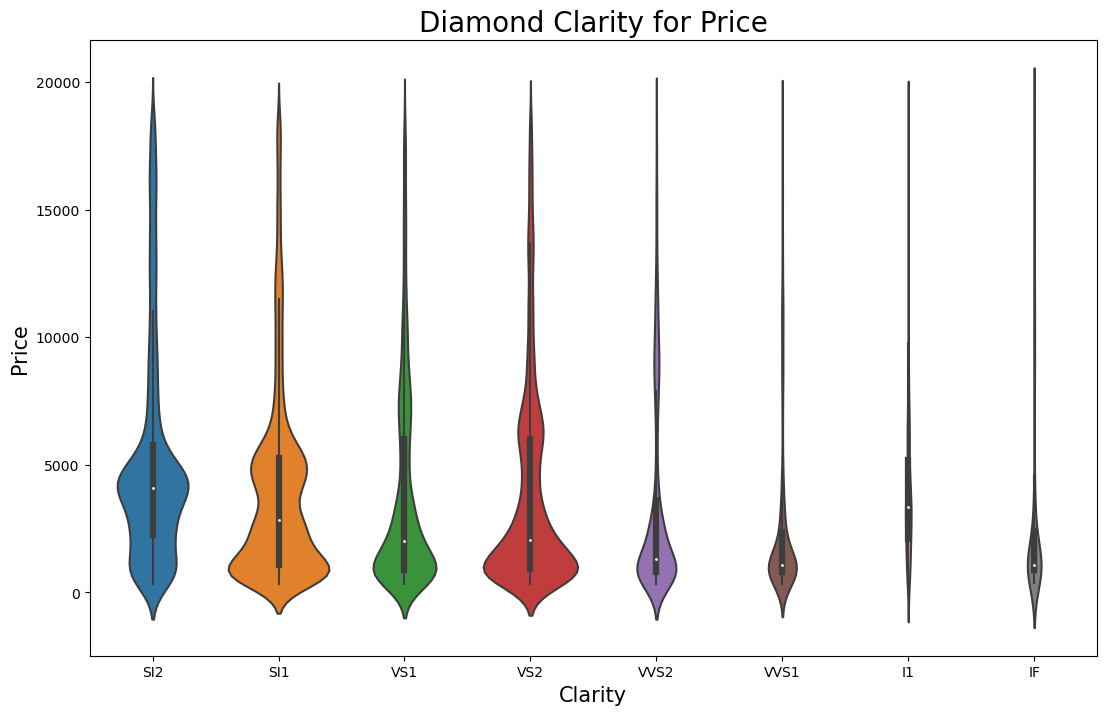

In [18]:
plt.figure(figsize=(13,8))
ax = sns.violinplot(x="clarity",y="price", data = dia_df, scale= "count")
ax.set_title("Diamond Clarity for Price", fontsize = 20)
ax.set_ylabel("Price", fontsize = 15)
ax.set_xlabel("Clarity", fontsize = 15)
plt.show()

# Correlation

### Correlation Analysis of Diamond Attributes

#### Strong Positive Correlations:

- **Carat and Dimensions (x, y, z):**
  - Carat weight is very strongly correlated with the physical dimensions (length `x`, width `y`, and depth `z`) of the diamonds. This is expected as larger diamonds generally have greater carat weight and larger dimensions.

- **Price and Carat:**
  - There is a strong positive correlation between price and carat (0.92). This indicates that diamonds with higher carat weights tend to be more expensive.

- **Price and Dimensions (x, y, z):**
  - Price also shows strong positive correlations with the physical dimensions (x: 0.88, y: 0.87, z: 0.86). This suggests that larger diamonds in terms of their dimensions tend to have higher prices.

#### Moderate Positive Correlations:

- **Table and Dimensions (x, y, z):**
  - The table size has moderate positive correlations with the dimensions (x: 0.20, y: 0.19, z: 0.15). This indicates that diamonds with larger table sizes generally have larger dimensions.

- **Depth and z:**
  - The depth percentage shows a moderate positive correlation with the depth dimension `z` (0.56). This suggests that diamonds with greater physical depth also tend to have higher depth percentages.

#### Weak or No Correlation:

- **Depth and Price:**
  - The depth percentage shows a very weak correlation with price (0.03), indicating that depth is not a significant predictor of diamond price. This suggests that other attributes, such as carat, have a stronger impact on price.

- **Table and Price:**
  - Similarly, the table size has a weak correlation with price (0.13), suggesting it has a minimal effect on the diamond's price.


<Axes: >

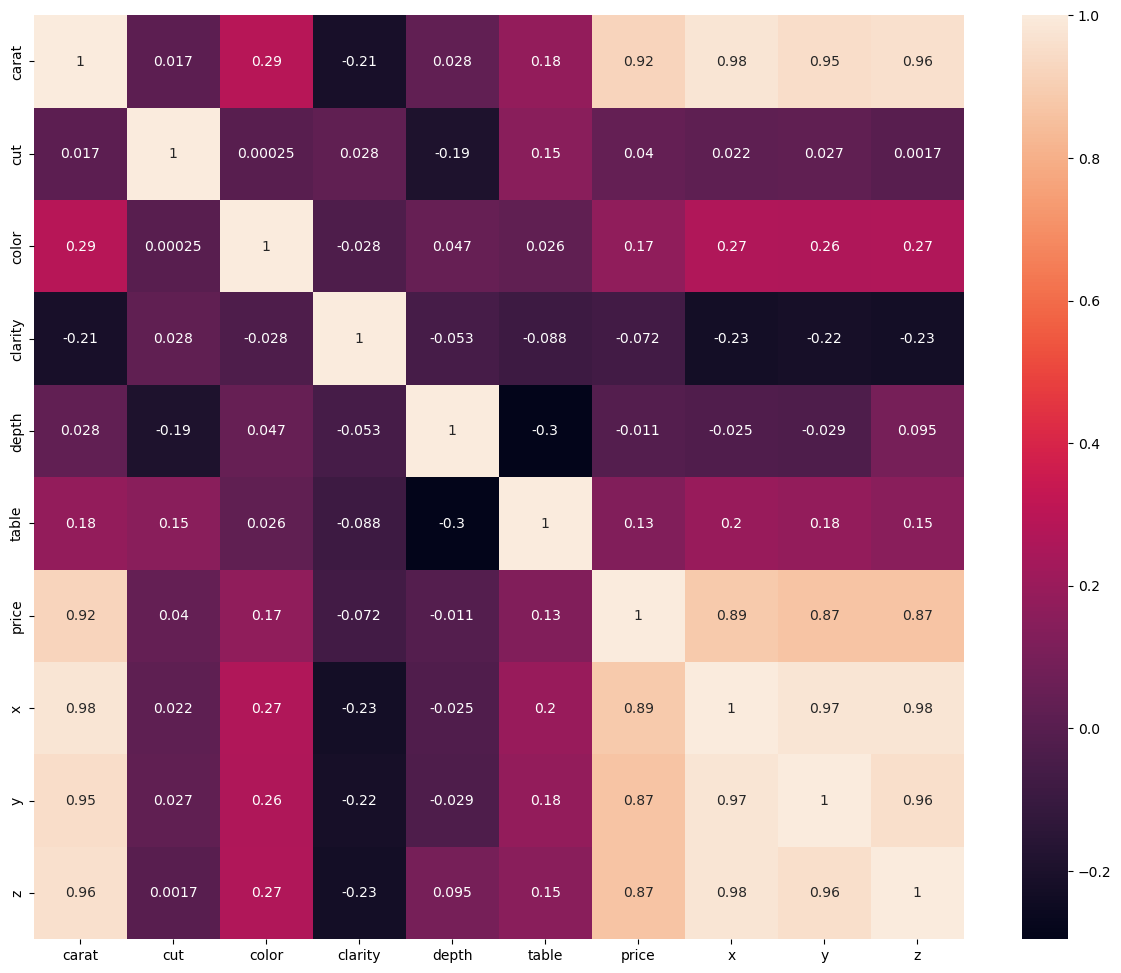

In [19]:
cmap = sns.diverging_palette(205, 133, 63, as_cmap=True)
corr_mat= dia_encoded_df.corr()
f, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corr_mat, annot=True)

## Predicting Price (Feature Selection Part)

In [20]:
x = dia_encoded_df.drop(['price'], axis = 1)
y = dia_encoded_df['price']
x.shape, y.shape

((53920, 9), (53920,))

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)
rf_regressor = RandomForestRegressor(n_estimators = 100, 
                                     random_state = 42)
rf_regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [22]:
y_pred = rf_regressor.predict(x_test)

**1.The low MAE and RMSE values indicate that the model predictions are fairly accurate.**

**2.The high R² value demonstrates that the model explains most of the variance in the diamond prices.**

In [23]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Absolute Error: 262.62
Mean Squared Error: 271555.91
Root Mean Squared Error: 521.11
R-squared: 0.98
